In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({
        'font.size': 18,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
#%matplotlib inline

# Constants used by paparazzi
intFracSpeed = 19
intFracAccel = 10
intFracPos = 8

In [93]:
# Function to draw a SuperEllipse (p-norm)
def afSuperEllipse(fPIndex, fRadius, afCenter):
    fEps = 10**(-6)
    afParam = np.linspace(0, 4*np.pi - fEps, 1000)
    afX = np.abs(np.cos(afParam))**(2 / fPIndex) * fRadius * np.sign(np.cos(afParam))
    afY = np.abs(np.sin(afParam))**(2 / fPIndex) * fRadius * np.sign(np.sin(afParam))
    return afX + afCenter[0], afY + afCenter[1]

In [317]:
# Global variable for saving or not a figure
intSaveFig = 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


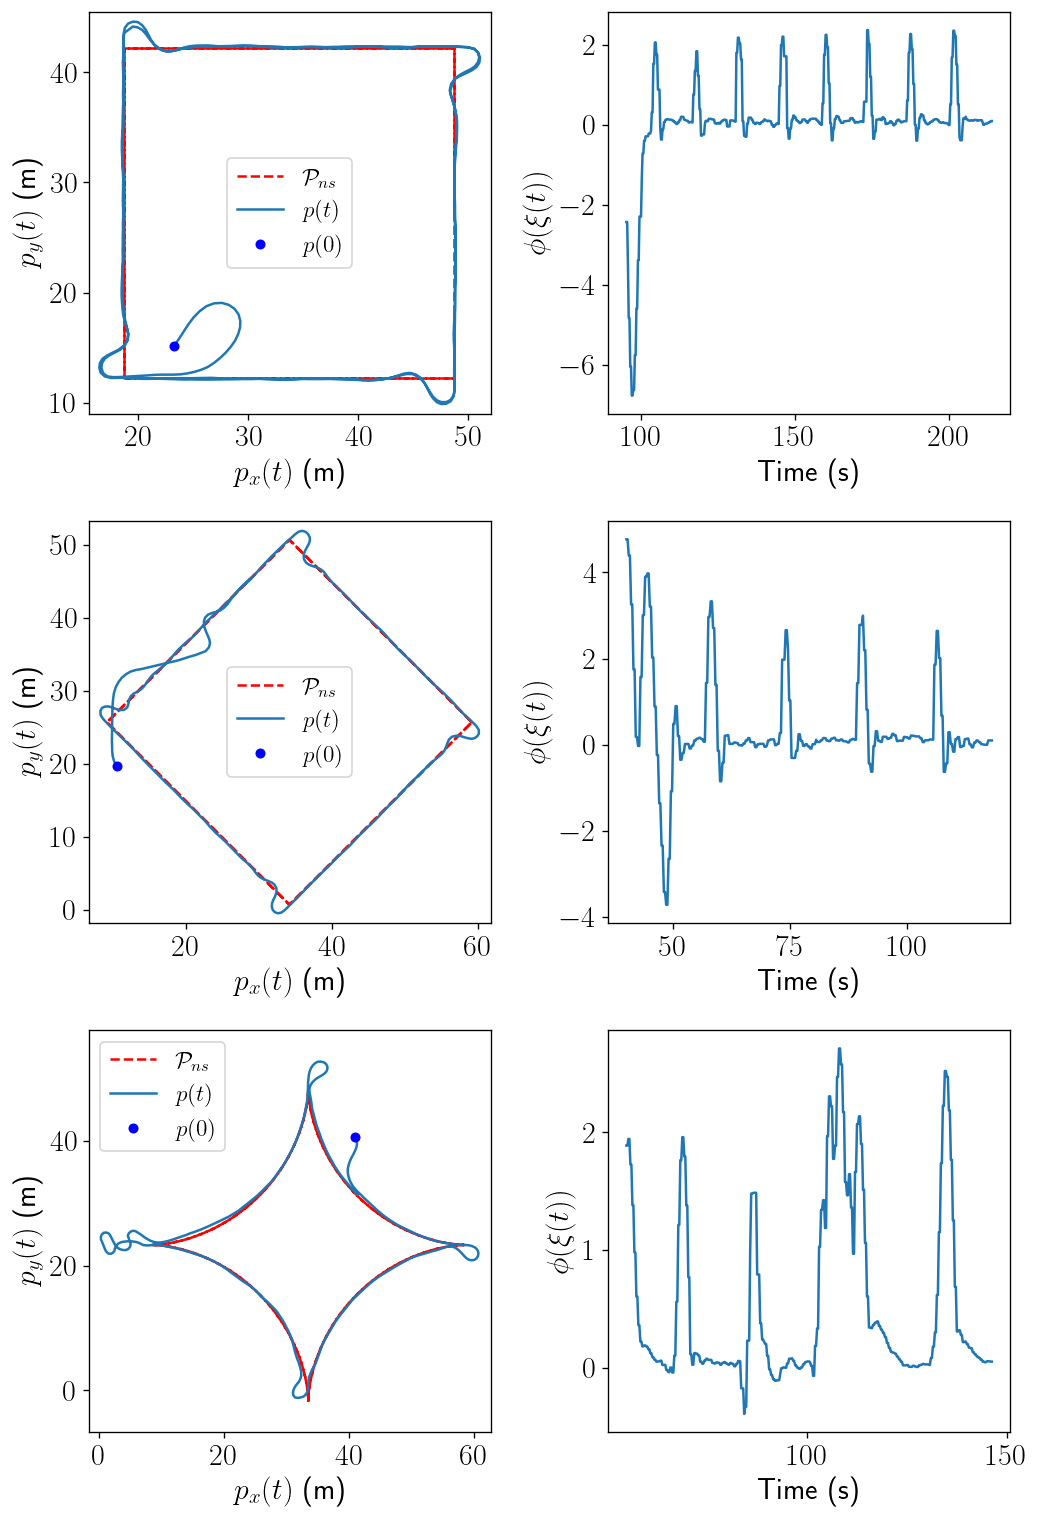

In [329]:
tbSqr = pd.read_table(r"25_02_25__10_01_21:5.csv")
tbRmb = pd.read_table(r"25_02_25__10_04_59:5.csv")
tbPNorm = pd.read_table(r"25_02_25__10_07_01:5.csv")

# Get Time array
afSqrTime = np.array(tbSqr['Time'])
afRmbTime = np.array(tbRmb['Time'])
afPNormTime = np.array(tbPNorm['Time'])

# Get Position array. In Paparazzi axes are inverted (IMU)
afSqrPosX = np.array(tbSqr['INS:ins_y']) / (1 << intFracPos)
afSqrPosY = np.array(tbSqr['INS:ins_x']) / (1 << intFracPos)
afRmbPosX = np.array(tbRmb['INS:ins_y']) / (1 << intFracPos)
afRmbPosY = np.array(tbRmb['INS:ins_x']) / (1 << intFracPos)
afPNormPosX = np.array(tbPNorm['INS:ins_y']) / (1 << intFracPos)
afPNormPosY = np.array(tbPNorm['INS:ins_x']) / (1 << intFracPos)

# Get Errors to path
afSqrPhi = np.array(tbSqr['GVF:error'])
afRmbPhi = np.array(tbRmb['GVF:error'])
afPNormPhi = np.array(tbPNorm['GVF:error'])

# Get Position of Square, Romboid and P Norm
afSqrSqrPos = np.array(tbSqr['GVF:p'])
afRmbRmbPos = np.array(tbRmb['GVF:p'])
afPNormPNormPos = np.array(tbPNorm['GVF:p'])

# Get last position of the center of the Square, Romboid and PNorm
afSqrSqrPos = np.fromstring(afSqrSqrPos[-1], count=3, sep=',')
afRmbRmbPos = np.fromstring(afRmbRmbPos[-1], count=3, sep=',')
afPNormPNormPos = np.fromstring(afPNormPNormPos[500], count=4, sep=',')

# Get arrays to draw the square, rhomboid and pnorm
afSqrDrawX, afSqrDrawY = afSuperEllipse(np.inf, afSqrSqrPos[2], afSqrSqrPos[0:2])
afRmbDrawX, afRmbDrawY = afSuperEllipse(1, afRmbRmbPos[2], afRmbRmbPos[0:2])
afPNormDrawX, afPNormDrawY = afSuperEllipse(afPNormPNormPos[3], afPNormPNormPos[2], afPNormPNormPos[0:2])

# Ad-hoc drawing indexes (in order to draw the interesting experiment times)
afSqrIndx = [300, -10]
afRmbIndx = [140, -10]
afPNormIndx = [190, -450]

plt.figure(figsize=(9,13))
# Square
plt.subplot(321)
#plt.plot(afSqrSqrPos[0], afSqrSqrPos[1], 'k.', markersize=10)
plt.plot(afSqrDrawX, afSqrDrawY, 'r--', label=r"$\mathcal P_{ns}$")
plt.plot(afSqrPosX[afSqrIndx[0]:afSqrIndx[1]], afSqrPosY[afSqrIndx[0]:afSqrIndx[1]], label=r"$p(t)$")
plt.plot(afSqrPosX[afSqrIndx[0]], afSqrPosY[afSqrIndx[0]], 'b.', markersize=10, label=r"$p(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')

# Rhomboid
plt.subplot(323)
#plt.plot(afRmbRmbPos[0], afRmbRmbPos[1], 'k.', markersize=10)
plt.plot(afRmbDrawX, afRmbDrawY, 'r--', label=r"$\mathcal P_{ns}$")
plt.plot(afRmbPosX[afRmbIndx[0]:afRmbIndx[1]], afRmbPosY[afRmbIndx[0]:afRmbIndx[1]], label=r"$p(t)$")
plt.plot(afRmbPosX[afRmbIndx[0]], afRmbPosY[afRmbIndx[0]], 'b.', markersize=10, label=r"$p(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')

# PNorm
plt.subplot(325)
#plt.plot(afPNormPNormPos[0], afPNormPNormPos[1], 'k.', markersize=10)
plt.plot(afPNormDrawX, afPNormDrawY, 'r--', label=r"$\mathcal P_{ns}$")
plt.plot(afPNormPosX[afPNormIndx[0]:afPNormIndx[1]], afPNormPosY[afPNormIndx[0]:afPNormIndx[1]], label=r"$p(t)$")
plt.plot(afPNormPosX[afPNormIndx[0]], afPNormPosY[afPNormIndx[0]], 'b.', markersize=10, label=r"$p(0)$")
plt.xlabel(r"$p_x(t)$ (m)")
plt.ylabel(r"$p_y(t)$ (m)")
plt.legend(fontsize=14)
plt.axis('equal')
plt.tight_layout()

plt.subplot(322)
plt.plot(afSqrTime[afSqrIndx[0]:afSqrIndx[1]], afSqrPhi[afSqrIndx[0]:afSqrIndx[1]])
plt.xlabel(r"Time (s)")
plt.ylabel(r"$\phi(\xi(t))$")

plt.subplot(324)
plt.plot(afRmbTime[afRmbIndx[0]:afRmbIndx[1]], afRmbPhi[afRmbIndx[0]:afRmbIndx[1]])
plt.xlabel(r"Time (s)")
plt.ylabel(r"$\phi(\xi(t))$")

plt.subplot(326)
plt.plot(afPNormTime[afPNormIndx[0]:afPNormIndx[1]], afPNormPhi[afPNormIndx[0]:afPNormIndx[1]])
plt.xlabel(r"Time (s)")
plt.ylabel(r"$\phi(\xi(t))$")

plt.tight_layout()


if(intSaveFig):
    plt.savefig("Figures/TrajExperimentV2.eps", format="eps")

In [285]:
tbSqr['GVF:error']

0      20.529598
1      20.529598
2      21.898579
3      21.898579
4      22.437637
         ...    
781     1.558594
782     2.378906
783     2.378906
784     2.957031
785     2.957031
Name: GVF:error, Length: 786, dtype: float64